# 1.准备操作

In [1]:
import PIL.Image as image #导入各种库
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt #用于显示结果的可视化库
import zipfile #解压 .zip 文件的库
import os #读取文件名的库
%matplotlib inline
plt.style.use('ggplot')

In [253]:
file_dir = '' #创建文件夹路径
imgs = [] # 用于保存原始图片的list
img_date = [] # 用于保存适用于聚类的数据
fz = zipfile.ZipFile(file_dir+'Image.zip', 'r') #解压给定的压缩包，解压在此文件夹内
for file in fz.namelist(): 
    fz.extract(file, file_dir)
for filename in os.listdir(file_dir+'Image'): #读取所有符合格式的图片，放在 imgs 中
    if '.png' in filename or '.jpg' in filename or '.jpeg' in filename:
        imgs.append(image.open(file_dir+'Image/'+filename))

In [254]:
for idx,img in enumerate(imgs):
    img = img.resize((400, 400)) 
    imgs[idx] = np.array(img)[...,:3] #将所有图片 resize 到 400*400 并转换为 ndarray 格式
    img_date.append(imgs[idx].reshape(-1,3)) #舍弃图像的 alpha 通道（若有）

# 2.开始各种kmeans聚类

## 2.1 直接肉眼看出k值，逐一聚类

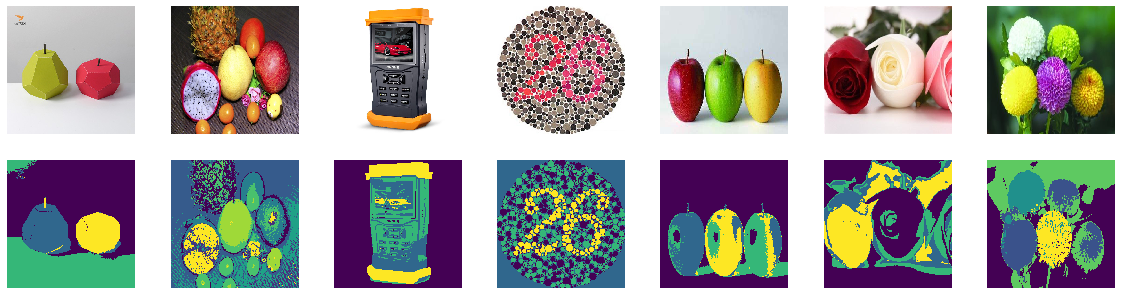

In [255]:
k = [4,8,4,4,4,4,5]

#聚类中心个数的一些经验值
plt.figure(figsize = (20,8)) #设置生成的图片组的长宽比
for i in range(len(imgs)): #生成每张图片的分割后的颜色标定图
    km0 = KMeans(n_clusters=k[i],random_state=28) #生成聚类模型，聚类中心为自己的经验值，随机值设置为 28
    km0.fit(img_date[i]) 
    color_img = km0.predict(img_date[i]) #返回值为图像对应像素点的 label ，[0,1,2,...]
    color_img.resize((400,400)) # resize 回可以显示的图片格式
    plt.subplot(3,7,i+1) 
    plt.imshow(imgs[i]) #显示原图进行对比
    plt.axis('off')
    plt.subplot(3,7,i+8)
    plt.imshow(color_img) # matplotlab 可以直接将 color_img 生成不同颜色的图，不需额外操作了
    plt.axis('off')

## 2.2 整合所有图片后单一预测

In [256]:
img_date_all = np.asarray(img_date).reshape(-1,3)
km1 = KMeans(n_clusters=10,random_state=28)
km1.fit(img_date_all)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=28, tol=0.0001, verbose=0)

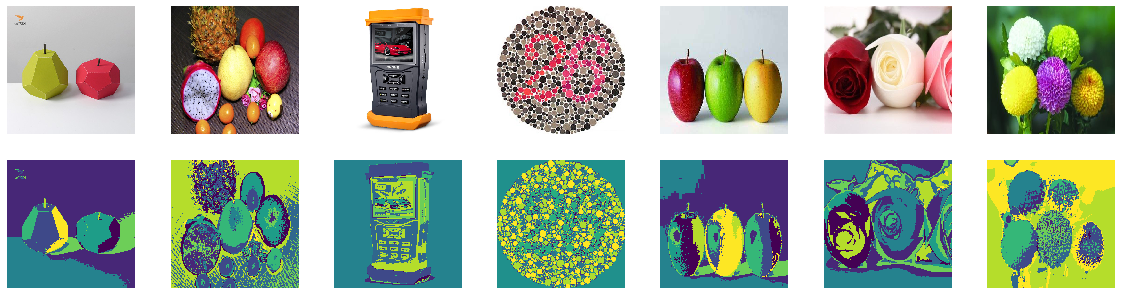

In [257]:
plt.figure(figsize = (20,8)) #设置生成的图片组的长宽比
for i in range(len(imgs)):
    color_img = km1.predict(img_date[i])
    color_img.resize((400,400))
    plt.subplot(3,7,i+1) 
    plt.imshow(imgs[i]) #显示原图进行对比
    plt.axis('off')
    plt.subplot(3,7,i+8)
    plt.imshow(color_img) # matplotlab 可以直接将 color_img 生成不同颜色的图，不需额外操作了
    plt.axis('off')

## 2.3 利用灰度值判定k值（未完成）

### 实现对图像的灰度值概率估计
### 方法一
`p = np.zeros(256)
idx,value = np.unique(imgs_gray[0].ravel(),return_counts=True)
p[idx]+=value
p.astype(np.int64)`
### 方法二
`length_p = 256
temp = np.bincount(imgs_gray[0].ravel())
p = np.pad(temp,length_p-temp.shape[0],'constant',constant_values=0)[length_p-temp.shape[0]:]
p.astype(np.int64)`

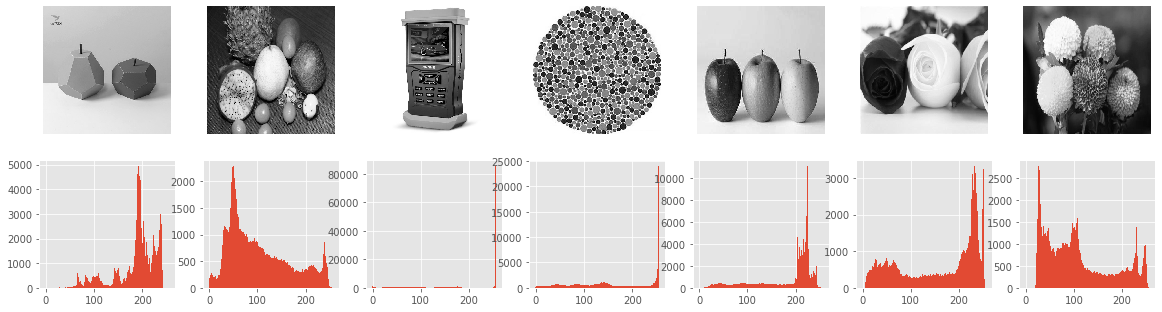

In [301]:
plt.figure(figsize = (20,8)) #设置生成的图片组的长宽比
imgs_gray = np.array([np.asarray(image.fromarray(i).convert('L')) for i in imgs])
# [4,8,4,4,4,4,5]
for i in range(len(imgs)):
    temp = np.bincount(imgs_gray[i].ravel())
    p = np.pad(temp,256-temp.shape[0],'constant',constant_values=0)[256-temp.shape[0]:]
    plt.subplot(3,7,i+1) 
    plt.imshow(imgs_gray[i],cmap='gray') #显示原图进行对比
    plt.axis('off')
    plt.subplot(3,7,i+8)
    plt.bar(np.arange(0,256),p,width=2) # matplotlab 可以直接将 color_img 生成不同颜色的图，不需额外操作了        

In [ ]:
plt.figure(figsize = (20,8)) #设置生成的图片组的长宽比
for i in range(len(imgs)):
    temp = np.bincount(imgs_gray[i].ravel())
    p = np.pad(temp,256-temp.shape[0],'constant',constant_values=0)[256-temp.shape[0]:]
    
    
    km2 = KMeans(n_clusters= ,random_state=28)
    km2.fit()
    
    color_img = km1.predict(img_date[i])
    color_img.resize((400,400))
    
    plt.subplot(3,7,i+1) 
    plt.imshow(imgs[i]) #显示原图进行对比
    plt.axis('off')
    plt.subplot(3,7,i+8)
    plt.imshow(color_img) # matplotlab 可以直接将 color_img 生成不同颜色的图，不需额外操作了
    plt.axis('off')

## 2.4 用像素batch的均值作为聚类数据，并对标签resize

In [311]:
def mean1(img):
    step = 100
    dx = imgs[0].shape[1]//step
    dy = imgs[0].shape[0]//step
    features = []
    for x in range(step):
        for y in range(step):
            features.append((np.mean(np.mean(img[x*dx:x*dx+dx,y*dy:y*dy+dy],axis=0),axis=0)))
    return np.array(features)
features = mean1(imgs[0])
for i in range(1,len(imgs)):
    features = np.vstack((features,mean1(imgs[i])))

In [312]:
km3 = KMeans(n_clusters=10,random_state=28)
km3.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=28, tol=0.0001, verbose=0)

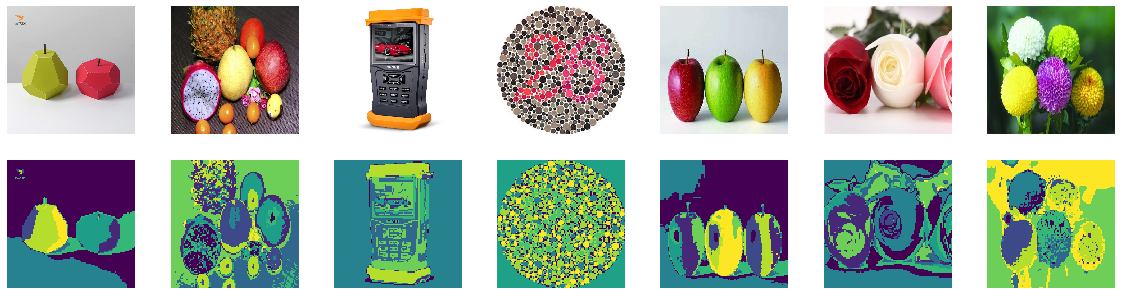

In [411]:
plt.figure(figsize = (20,8)) #设置生成的图片组的长宽比
for i in range(len(imgs)):  
    color_img = km3.predict(mean1(imgs[i])).reshape(100,100)
    color_img = np.asarray(image.fromarray(color_img).resize((400,400)))
    plt.subplot(3,7,i+1) 
    plt.imshow(imgs[i]) #显示原图进行对比
    plt.axis('off')
    plt.subplot(3,7,i+8)
    plt.imshow(color_img) # matplotlab 可以直接将 color_img 生成不同颜色的图，不需额外操作了
    plt.axis('off')

## 2.5 思路：设置两个聚类器，第一个将所有图像数据聚成 k 类，然后对一张图像预测其 label ，再统计以窗口大小为win_size的类别个数，并保证前2维不变，第3维大小为 k，最后对其用第二个聚类器聚类

In [399]:
def count_class(img,k):
    win_size = 100
    count_img = np.zeros((img.shape[0],img.shape[1],k))
    temp = np.pad(img,int(win_size/2-1),'edge')
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            emm = np.bincount(temp[row:row+win_size,col:col+win_size].ravel())
            count_img[row,col] = np.pad(emm,k-emm.shape[0],'constant',constant_values=0)[k-emm.shape[0]:]
    return count_img

In [389]:
img_date_all = np.asarray(img_date).reshape(-1,3)
km4 = KMeans(n_clusters=10,random_state=28)
km4.fit(img_date_all)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=28, tol=0.0001, verbose=0)

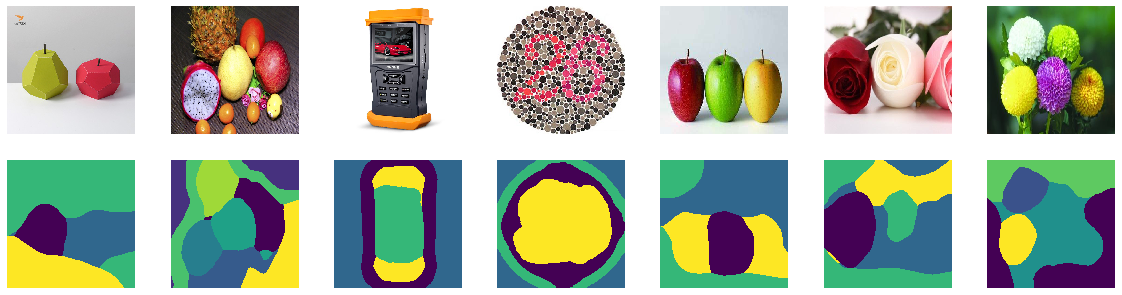

In [412]:
plt.figure(figsize = (20,8)) #设置生成的图片组的长宽比
k = [4,8,4,4,4,4,5]
for i in range(len(imgs)):  
    color_img = km4.predict(img_date[i]).reshape(400,400)
    count_img = count_class(color_img,10)
    km4_5 = KMeans(n_clusters=k[i],random_state=28)
    color_img = km4_5.fit_predict(count_img.reshape(-1,10)).reshape(400,400)
    plt.subplot(3,7,i+1) 
    plt.imshow(imgs[i]) #显示原图进行对比
    plt.axis('off')
    plt.subplot(3,7,i+8)
    plt.imshow(color_img) # matplotlab 可以直接将 color_img 生成不同颜色的图，不需额外操作了
    plt.axis('off')